<a href="https://colab.research.google.com/github/ann-e888/Neural-Networks---Pytorch-Lightning/blob/main/ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# model class inheriting nn module
class Model(nn.Module):
  # input layer (4 feautures of the flower)
  # hidden layers with n naurons in it
  # output (3 classes of iris flowers)
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
      super().__init__() #instatnciate nn.Module
      self.fc1 = nn.Linear(in_features, h1)
      self.fc2 = nn.Linear(h1, h2)
      self.out = nn.Linear(h2, out_features)

    def forward(self, x):
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = self.out(x)

      return x


In [ ]:
# picking manual seed for randomiztaion
torch.manual_seed(32)

In [ ]:
#instance of model
model = Model()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [ ]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df['species'] = df['species'].replace('setosa', 0.0)
df['species'] = df['species'].replace('versicolor', 1.0)
df['species'] = df['species'].replace('virginica', 2.0)

<ipython-input-43-e248df823654>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df['species'].replace('virginica', 2.0)


In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
X = df.drop('species', axis=1)
y = df['species']

In [ ]:
X = X.values
y = y.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# epoch - one run of the traing daat through our network
epochs = 100
losses = []
for i in range(epochs):
  # go forward and get a prediction
  y_pred = model.forward(X_train) # get predicted results
  # mesure the loss
  loss = criterion(y_pred, y_train)
  # keep track of the losses
  losses.append(loss.detach().numpy())
  # print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i}, loss: {loss}')
  # backpropagation, take the erros rate of forward propagation
  # and feed it back to the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0, loss: 1.169895887374878
Epoch: 10, loss: 0.9578844308853149
Epoch: 20, loss: 0.7988812923431396
Epoch: 30, loss: 0.634953498840332
Epoch: 40, loss: 0.44043001532554626
Epoch: 50, loss: 0.291716992855072
Epoch: 60, loss: 0.17829042673110962
Epoch: 70, loss: 0.11587586998939514
Epoch: 80, loss: 0.08928147703409195
Epoch: 90, loss: 0.07743765413761139


Text(0.5, 0, 'Epochs')

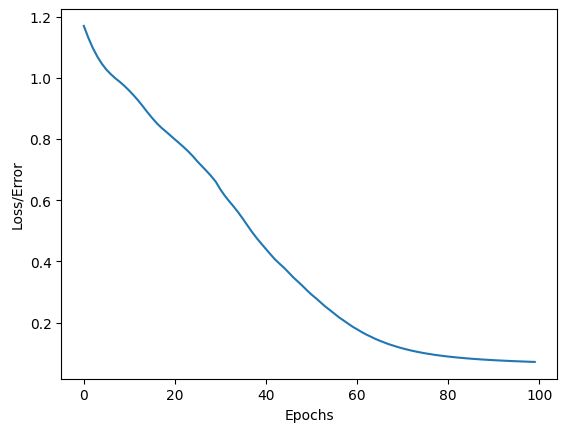

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss/Error')
plt.xlabel('Epochs')

In [ ]:
# Evaluate model on test dataset
with torch.no_grad(): # turning off backpropagation
  y_eval = model.forward(X_test) # X_test are features y_eval are features
  loss = criterion(y_eval, y_test) # find the loss or error


In [ ]:
loss

tensor(0.0539)

In [ ]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    # what type of class the network predicts
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')
    # correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1


print(f'We got {correct} correct out of {len(y_test)}.')

1.) tensor([-3.3580,  3.9452,  0.3616]) 	 1 	 1
2.) tensor([  7.5862,   1.1113, -11.3861]) 	 0 	 0
3.) tensor([  6.6288,   1.5092, -10.4603]) 	 0 	 0
4.) tensor([-3.3304,  4.2647,  0.0569]) 	 1 	 1
5.) tensor([-7.3705,  2.8135,  5.1481]) 	 2 	 2
6.) tensor([-7.3749,  3.9061,  4.2781]) 	 2 	 2
7.) tensor([  6.2304,   1.6527, -10.0543]) 	 0 	 0
8.) tensor([  6.8783,   1.4056, -10.7016]) 	 0 	 0
9.) tensor([-2.6728,  4.3138, -0.6444]) 	 1 	 1
10.) tensor([  7.2201,   1.3890, -11.1494]) 	 0 	 0
11.) tensor([-3.8269,  4.4110,  0.5165]) 	 1 	 1
12.) tensor([-8.6886,  1.9990,  6.9012]) 	 2 	 2
13.) tensor([-2.0605,  3.8275, -0.7672]) 	 1 	 1
14.) tensor([-1.0676,  4.3809, -2.2975]) 	 1 	 1
15.) tensor([-7.5000,  2.6230,  5.3318]) 	 2 	 2
16.) tensor([-8.6214,  1.5491,  7.1280]) 	 2 	 2
17.) tensor([-3.7724,  3.6503,  0.9422]) 	 1 	 1
18.) tensor([-6.7624,  2.7791,  4.5289]) 	 2 	 2
19.) tensor([-1.6978,  4.2047, -1.4772]) 	 1 	 1
20.) tensor([  7.8104,   1.3824, -11.9435]) 	 0 	 0
21.) tensor

In [ ]:
new_iris = torch.Tensor([4.7, 3.2, 1.3, 0.2])

In [ ]:
with torch.no_grad():
  print(model(new_iris))

tensor([  6.9155,   1.2532, -10.6096])


In [ ]:
# Save and load the model
torch.save(model.state_dict(), 'iris_model.pt')

In [ ]:
# load the saved model
new_model = Model()
new_model.load_state_dict((torch.load('iris_model.pt')))

<ipython-input-58-a10b24e069e7>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict((torch.load('iris_model.pt')))


<All keys matched successfully>

In [ ]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)